In [1]:
from functools import partial
from math import pi
import numpy as np
np.set_printoptions(precision=4, suppress=True, linewidth=np.inf)
import matplotlib.pyplot as plt

4
6
8


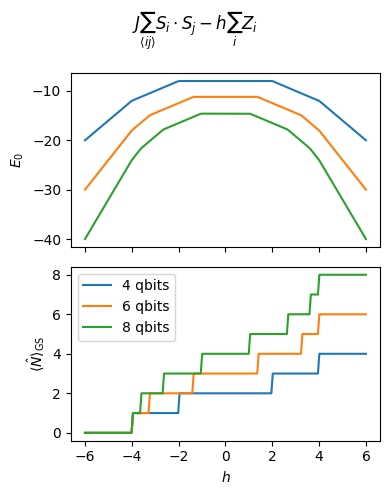

In [2]:
from hamiltonian import n_of_h

fig, ax = plt.subplots(2, 1, figsize=(4,5), sharex=True)
fig.suptitle("$J\\sum_{\\langle ij \\rangle} S_i \\cdot S_j - h \\sum_{i} Z_i$")

for n, e in [
    (4, [(0,1), (2,3), (1,2), (3,0)]), 
    (6, [(0,1), (1,2), (2,3), (3,4), (4,5), (5,0)]), 
    (8, [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,0)]),
    # (10, [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,8), (8,9), (9,0)]),  # too long
]:
    print(n)

    n_of_h_4 = partial(n_of_h, nsites=n, edges=e)
    h_vec = np.linspace(-6,6, 200)
    e_vec = np.array([n_of_h_4(h)[0] for h in h_vec])
    s_vec = np.array([n_of_h_4(h)[1] for h in h_vec])

    ax[0].plot(h_vec, e_vec, label=f"{n} qbits")
    ax[1].plot(h_vec, s_vec, label=f"{n} qbits")

ax[0].set_ylabel("$E_0$")
ax[1].set_ylabel("$\\langle \\hat N \\rangle _{\\rm GS}$")
ax[1].set_xlabel("$h$")
ax[1].legend()
plt.tight_layout()
plt.show()